<a href="https://colab.research.google.com/github/Priyo-prog/Deep-Learning-with-Tensorflow/blob/main/Neural%20Network%20Regression%20with%20Tensorflow/Neural_Network_Medical_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [32]:
# Read the insuarnce dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## To normalize we need classes from scikitlearn 


In [33]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create a column transformer 
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
    )

In [36]:
# Let's try one hot encode using pandas get.dummies()
#insurance_one_hot = pd.get_dummies(insurance)
#insurance_one_hot.head(10)

In [39]:
# Create X & y (features and labels)
X = insurance.drop("charges", axis=1)

y = insurance["charges"]
X.head(5), y.head(5)

(   age     sex     bmi  children smoker     region
 0   19  female  27.900         0    yes  southwest
 1   18    male  33.770         1     no  southeast
 2   28    male  33.000         3     no  southeast
 3   33    male  22.705         0     no  northwest
 4   32    male  28.880         0     no  northwest, 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 Name: charges, dtype: float64)

In [40]:
# Create training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [41]:
# Fit the column transformer to our train data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [43]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [44]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [45]:
X_train_normal.shape

(1070, 11)

In [50]:
# Create a neural network model
tf.random.set_seed(42)

# Create a model
insurance_model = tf.keras.Sequential([
                 tf.keras.layers.Dense(10),
                 tf.keras.layers.Dense(1)                      
])


# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13344.3066 - mae: 13344.3066
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13339.4785 - mae: 13339.4785
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13325.8730 - mae: 13325.8730
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13284.3896 - mae: 13284.3896
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13156.0547 - mae: 13156.0547
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 12756.2744 - mae: 12756.2744
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 11604.6348 - mae: 11604.6348
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 9815.3809 - mae: 9815.3809
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 8611.2627 - mae: 8611.2627
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 8165.9170 - 

In [47]:
insurance_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Check the results of the insurance_model on the test data
insurance_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3170.0486 - mae: 3170.0486


[3170.048583984375, 3170.048583984375]

In [9]:
y_train.median(), y_train.mean() # Model not performing well

(9575.4421, 13346.089736364489)

# Improve the model

To(try) to improve our model, we'll run experiments:

1. Add an extra layer with extra units and using Adam optimizer
2. Train for longer

In [10]:
#Create the model
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
                  tf.keras.layers.Dense(100),
                  tf.keras.layers.Dense(10),
                  tf.keras.layers.Dense(1)                     
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(lr=0.01),
                        metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [11]:
# Evaluate the model2
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3167.3213 - mae: 3167.3213


[3167.3212890625, 3167.3212890625]

In [12]:
# Create a model 3
tf.random.set_seed(42)

# 1. Create a model
insurance_model_3 = tf.keras.Sequential([
                  tf.keras.layers.Dense(100),
                  tf.keras.layers.Dense(10),
                  tf.keras.layers.Dense(1)                       
]) 

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_test,y_test, epochs=200, verbose=0)

In [13]:
# Evaluate the model 3
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3147.7261 - mae: 3147.7261


[3147.72607421875, 3147.72607421875]

Text(0.5, 0, 'epochs')

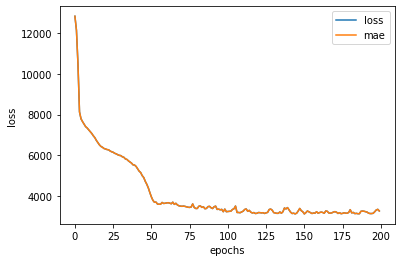

In [14]:
# Plot history also known as loss curve or a training curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Preprocessing data(normalization and standardization)

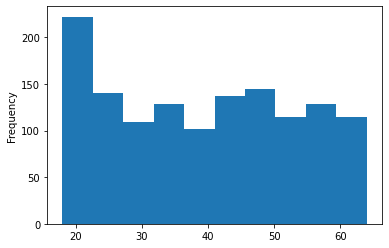

In [15]:
X["age"].plot(kind="hist")

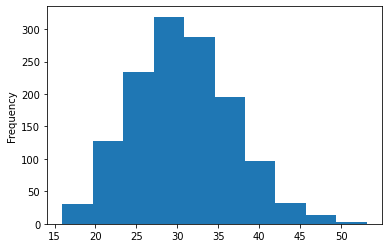

In [16]:
X["bmi"].plot(kind="hist")